In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Function to catch multiplication errors
def numpy_dot(A,B):
    try:
        A_mult_B = np.dot(A,B)
        return A_mult_B
    except: 
        return (f"Cannot multiply shapes {A.shape} and {B.shape}")

#### Question 1

In [29]:
# Initialize vectors
a = np.array([1, 3, 2, -3])
b = np.array([-2, 1, -1, 2])

# A1
print(f"A1: b.a = {numpy_dot(b,a)}\n")

#A2
b_tr = np.transpose([b])    # transpose b
a = np.array([a])           # reshape a from shape (m,) to (1,m)
print(f"A2: b_tr.a =\n {numpy_dot(b_tr,a)}")

A1: b.a = -7

A2: b_tr.a =
 [[-2 -6 -4  6]
 [ 1  3  2 -3]
 [-1 -3 -2  3]
 [ 2  6  4 -6]]


In [30]:
# Initialize A matrix, it will be used in the following questions
A = np.array([[1,1,0], [0,2,-1]])

In [31]:
# Initializing vectors
a1 = np.array([1,3])
a2 = np.array([1,3,1])

#A3
a1 = np.array([a1])     # reshape a1 from shape (m,) to (1,m)
print(f"A3:\n a.A = {numpy_dot(a1,A)}\n A.a = {numpy_dot(A,a1)}\n")


#A4
a2 = np.array([a2])                         # reshape a2 from shape (m,) to (1,m)
print(f"A4:\n a.A = {numpy_dot(a2,A)}")
a2_tr = np.transpose(a2)                    # transpose a2
print(f" A.a_tr = \n {numpy_dot(A,a2_tr)}")

A3:
 a.A = [[ 1  7 -3]]
 A.a = Cannot multiply shapes (2, 3) and (1, 2)

A4:
 a.A = Cannot multiply shapes (1, 3) and (2, 3)
 A.a_tr = 
 [[4]
 [5]]


In [32]:
# Initialize B matrices
B1 = np.array([[3,2], [5,1], [2,-4]])
B2 = np.array([[3,2], [5,1], [2,-4], [2,1]])

#A5
print(f"A5:\n A.B =\n {numpy_dot(A,B1)}\n B.A =\n {numpy_dot(B1,A)}")

#A6
print(f"A6:\n A.B = {numpy_dot(A,B2)}\n B.A =\n {numpy_dot(B2,A)}")

A5:
 A.B =
 [[8 3]
 [8 6]]
 B.A =
 [[ 3  7 -2]
 [ 5  7 -1]
 [ 2 -6  4]]
A6:
 A.B = Cannot multiply shapes (2, 3) and (4, 2)
 B.A =
 [[ 3  7 -2]
 [ 5  7 -1]
 [ 2 -6  4]
 [ 2  4 -1]]


#### Question 2

In [33]:
'''
Manual replacement for numpy.dot()
Arguments: A->Numpy array, B->Numpy array
Output: A.B 
'''
def numpy_dot_manual(A, B):
    # Calculate dimensions of input
    A_dim = A.ndim
    B_dim = B.ndim

    # If arguments are not 1D or 2D
    if A_dim>2 or B_dim>2:
        return f"DimError: Arguments are not vectors or matrices"
    
    else:

        # Arguments are 1D -> Vector dot product
        if A_dim==B_dim==1:

            # If the lengths are unequal raise error
            if A.shape != B.shape:
                return f"LenError: Length {A.shape} not equal to Length {B.shape}"
            
            # Calculate dot product
            else:
                return sum([a*b for a,b in zip(A,B)])

        # Arguments are 2D -> Matrix multiplication
        elif A_dim<=2 and B_dim<=2:

            # Reshape 1D arrays to 2D to compare shape
            if A_dim==1:
                A = np.array([A])
            if B_dim==1:
                B = np.array([B])
            
            # If number of columns in A do not match number of rows in B raise error
            if A.shape[1]!=B.shape[0]:
                return f"ShapeError: Cannot multiply {A.shape} with {B.shape}"

            # Calculate matrix
            else:
                A_mult_B = np.zeros((A.shape[0], B.shape[1]))
                for i,row in enumerate(A):
                    for j,col in enumerate(np.transpose(B)):
                        A_mult_B[i][j] = sum([a*b for a,b in zip(row,col)])
                return A_mult_B

In [34]:
# Initialize vectors
a = np.array([1, 3, 2, -3])
b = np.array([-2, 1, -1, 2])

# A1
print(f"A1: b.a = {numpy_dot_manual(b,a)}\n")

#A2
b_tr = np.transpose([b])    # transpose b
print(f"A2: b_tr.a =\n {numpy_dot_manual(b_tr,a)}")

A1: b.a = -7

A2: b_tr.a =
 [[-2. -6. -4.  6.]
 [ 1.  3.  2. -3.]
 [-1. -3. -2.  3.]
 [ 2.  6.  4. -6.]]


In [35]:
# Initialize A matrix, it will be used in the following questions
A = np.array([[1,1,0], [0,2,-1]])

In [36]:
# Initializing vectors
a1 = np.array([1,3])
a2 = np.array([1,3,1])

#A3
a1 = np.array([a1])     # reshape a1 from shape (m,) to (1,m)
print(f"A3:\n a.A = {numpy_dot_manual(a1,A)}\n A.a = {numpy_dot_manual(A,a1)}\n")


#A4
a2 = np.array([a2])                         # reshape a2 from shape (m,) to (1,m)
print(f"A4:\n a.A = {numpy_dot_manual(a2,A)}")
a2_tr = np.transpose(a2)                    # transpose a2
print(f" A.a_tr = \n {numpy_dot_manual(A,a2_tr)}")

A3:
 a.A = [[ 1.  7. -3.]]
 A.a = ShapeError: Cannot multiply (2, 3) with (1, 2)

A4:
 a.A = ShapeError: Cannot multiply (1, 3) with (2, 3)
 A.a_tr = 
 [[4.]
 [5.]]


In [37]:
# Initialize B matrices
B1 = np.array([[3,2], [5,1], [2,-4]])
B2 = np.array([[3,2], [5,1], [2,-4], [2,1]])

#A5
print(f"A5:\n A.B =\n {numpy_dot_manual(A,B1)}\n B.A =\n {numpy_dot_manual(B1,A)}")

#A6
print(f"A6:\n A.B = {numpy_dot_manual(A,B2)}\n B.A =\n {numpy_dot_manual(B2,A)}")

A5:
 A.B =
 [[8. 3.]
 [8. 6.]]
 B.A =
 [[ 3.  7. -2.]
 [ 5.  7. -1.]
 [ 2. -6.  4.]]
A6:
 A.B = ShapeError: Cannot multiply (2, 3) with (4, 2)
 B.A =
 [[ 3.  7. -2.]
 [ 5.  7. -1.]
 [ 2. -6.  4.]
 [ 2.  4. -1.]]


#### Question 3

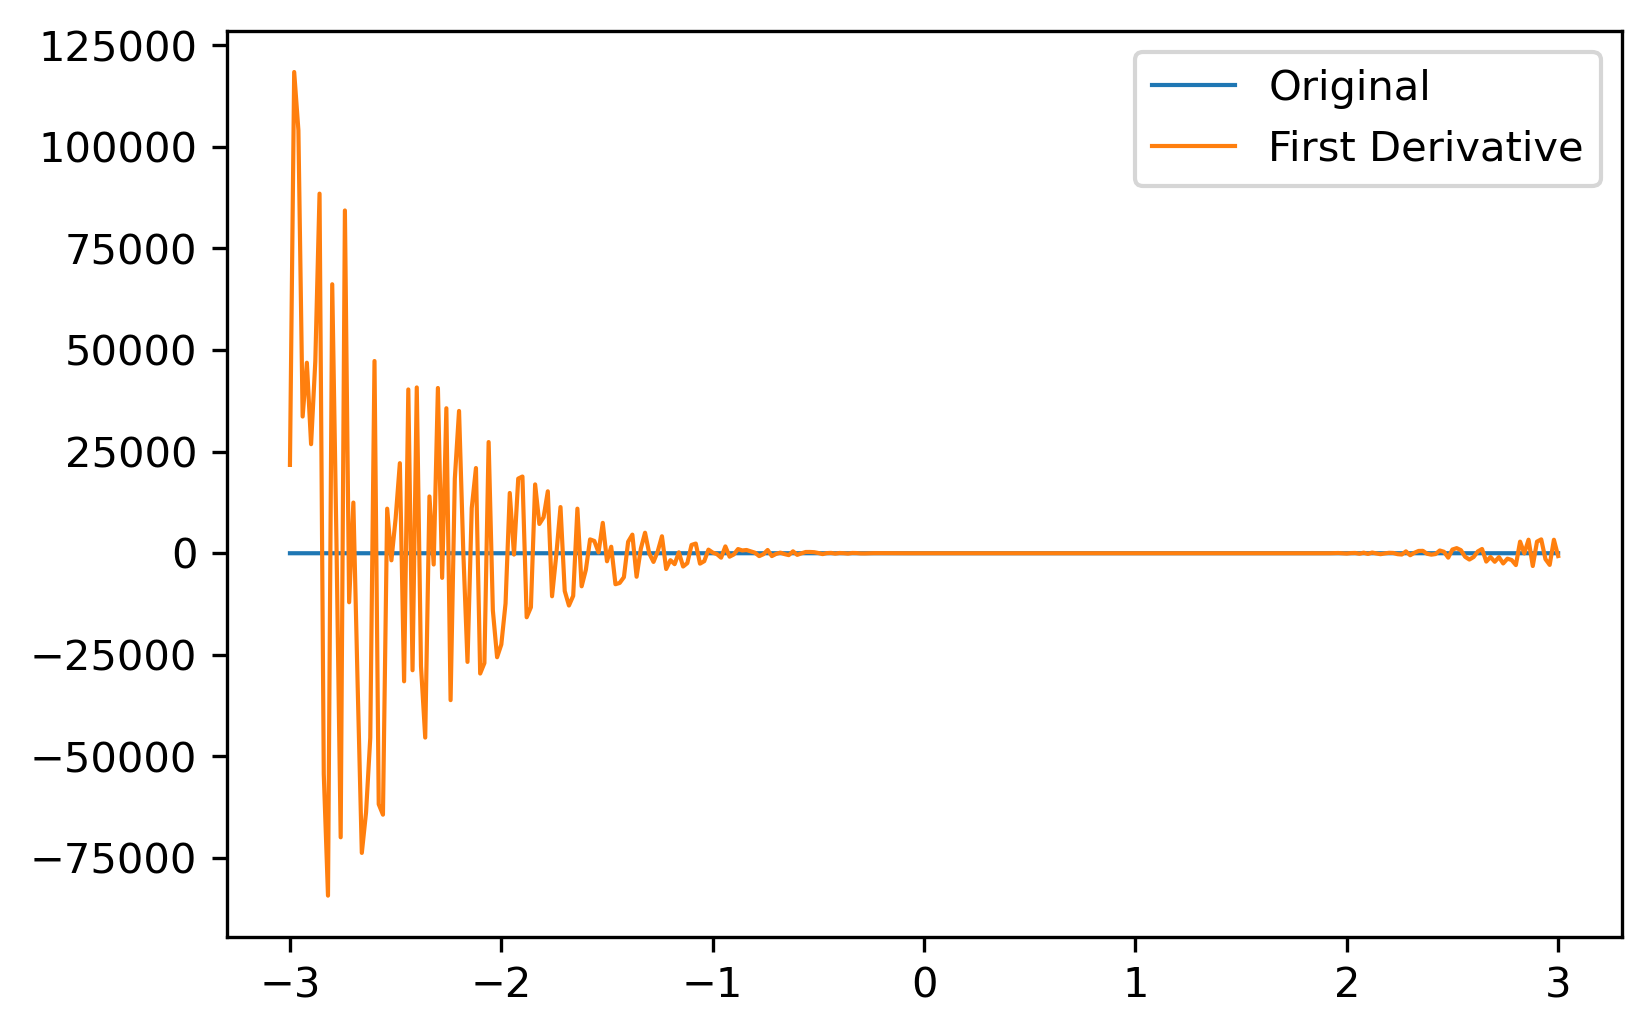

In [38]:
x = np.linspace(-3, 3, 301)
y = np.cos((3*(x**2) - 5*x)**3)
yPrim = (-3) * (np.sin((3*(x**2) - 5*x)**3)) * ((3*(x**2) - 5*x)**2) * (6*x - 5)

plt.figure(dpi=300)
plt.plot(x, y, label='Original', linewidth=1.0)
plt.plot(x, yPrim,label='First Derivative', linewidth=1.0)

plt.legend()
plt.show()

In [39]:
# Calculating derivatives using pytorch
import torch

def get_derivative(p):
    x = torch.tensor(p, requires_grad=True)
    y = torch.cos((3*(x**2) - 5*x)**3)

    y.backward()
    return x.grad.detach().numpy()

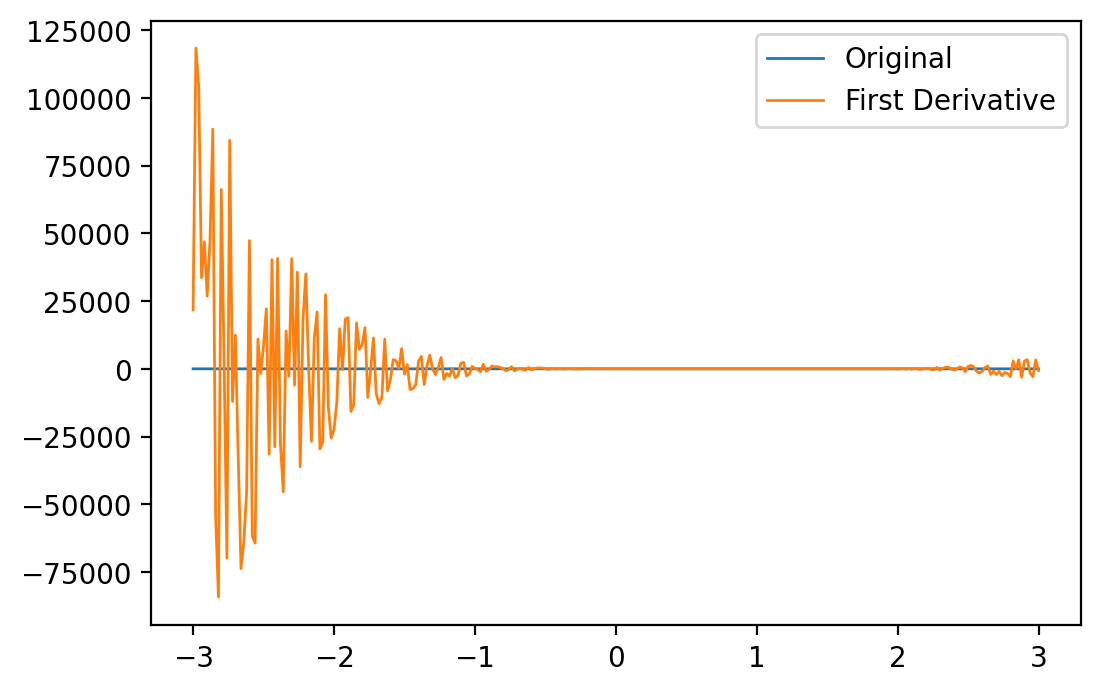

In [40]:
x = np.linspace(-3, 3, 301)
y = np.cos((3*(x**2) - 5*x)**3)
yPrim = [get_derivative(i) for i in x]

plt.figure(dpi=200)
plt.plot(x, y, label='Original', linewidth=1.0)
plt.plot(x, yPrim,label='First Derivative', linewidth=1.0)

plt.legend()
plt.show()

Rochishnu Banerjee

banerjr2@miamioh.edu

In [12]:
import numpy as np
k = list(np.arange(5))
k.append(0)
print(k)

[0, 1, 2, 3, 4, 0]


In [14]:
k = list(np.arange(5-1,-1,-1))
k.insert(0,0)
k

[0, 4, 3, 2, 1, 0]

In [ ]:
np